<a href="https://colab.research.google.com/github/avilavate/deel_learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classifiaction using tensorflow

Architect a neural network for image classification

- Multiclass classification usecase

# Create data to view and fit
- starting with simple data (circles)

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

In [ ]:
n_samples=1000

X,y= make_circles(n_samples,
                  noise=0.02,
                  random_state=42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:10], y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

# Visualize circles
- load pandas

In [ ]:
import pandas as pd


In [ ]:
circles=pd.DataFrame({'X0':X[:,0],
                      'X1':X[:,1],
                      'labels':y
                      })

In [ ]:
circles

,X0,X1,labels
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


# Visualize with plot
- import matplotlib

In [ ]:
import matplotlib.pyplot as plt

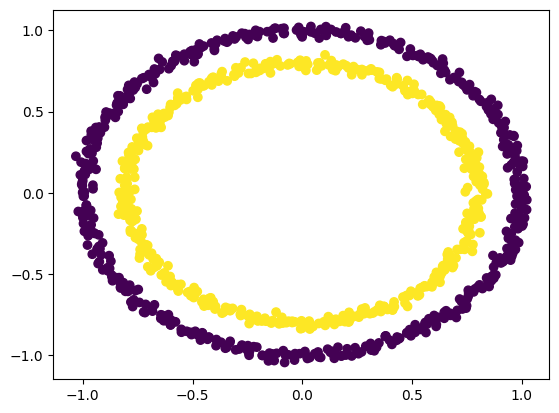

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

# Modeling with tensorflow

- Steps:
  - Create
  - Compile
  - Build
  - Evaluate
  - Tweak & Reevaluate (n times)

In [ ]:
# set the seed

import tensorflow as tf

tf.random.set_seed(42)

In [ ]:
# create model

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(2)
])

In [ ]:
# Compile the model model_1

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

In [ ]:
# Fit the model model_1

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1167 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1701 - accuracy: 0.5120
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8158 - accuracy: 0.5120
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.3787 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 2.0093 - accuracy: 0.5070


In [ ]:
# The accurace is hardly 50% lets train it for longer
model_1.fit(X,y,epochs=50, verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4990


[0.6932154297828674, 0.49900001287460327]

# * Seems the model is too simple and the accuracy is ~50% its seems guessing the lebles

- Adding more layers
- Adding more nodes/players

In [ ]:
# create model_2

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(2)
])


# Compile the model model_2

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

In [ ]:
model_2.fit(X,y,epochs=50, verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4990


[0.6932154297828674, 0.49900001287460327]

# Seems the model is still underfitting simple and the accuracy is ~50% its seems guessing the lebles

- Change the Optimizer to Adam
- Adding more nodes/players
- Increasing epochs

In [ ]:
# create model_3

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(5)
])


# Compile the model model_2

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [ ]:
model_3.fit(X,y,epochs=50, verbose=0)

In [ ]:
# Evaluate the model_3

model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 2.2987 - accuracy: 0.0460


[2.298734188079834, 0.04600000008940697]

# lets increase the number of nuerons to 100 and see the accurace of the new model_4

- Increasing the nodes
- Keeping Adam as optimizer

In [ ]:
# create model_3

model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])


# Compile the model model_2

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [ ]:
#Fit the Model
history_model_4=model_4.fit(X,y,epochs=100, verbose=0)

In [ ]:
# Evaluate the model_4

model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5090


[0.6958891749382019, 0.5090000033378601]

# All of these models (Except model_3) are guessing with 50% accuracy, thats bad.

- Visualize the data (predictions of model_4)

In [ ]:
preds=model_4.predict(X)

32/32 [==============================] - 0s 1ms/step


In [ ]:
preds[0:10]

array([[0.48723665],
       [0.5466919 ],
       [0.54849386],
       [0.55183744],
       [0.45780584],
       [0.55465806],
       [0.5407307 ],
       [0.4834266 ],
       [0.4866658 ],
       [0.5533266 ]], dtype=float32)

# A final model with has following tweaks:
- Hidden layer activation is set to relu
- added 2 sets of hidden layers with 4 neurons each
- Output layer has sigmoid activation to summort non-linearity

In [ ]:
# Define the model

model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="hidden_1"),
    tf.keras.layers.Dense(4, activation="relu", name="hidden_2"),
    tf.keras.layers.Dense(1, activation="sigmoid" , name="output"),
])

In [ ]:
# Compile the model model_5

model_5.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy']
                )

In [ ]:
# model_5 Summary

history_model_5=model_5.fit(X,y, epochs=150,verbose=0)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

# A reusable function to plot the input (X,y) space and prediction classes

In [ ]:
import numpy as np

In [ ]:
def plot_predictions(model= model_5,
                     X=X,
                     y=y):
  fig = plt.figure()
  ax = fig.add_subplot()

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))


  Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=tf.reshape(Z,xx.shape)

  #Z=tf.cast(Z,'float32')
  # Adding color bar
  plt.contour(xx, yy, Z, levels=1, cmap='Reds', alpha=1)
  plt.scatter(X[:, 0], X[:, 1], c=y,edgecolors='k')
  plt.colorbar(label='Predictions')
  plt.xlabel('X Axis Label')
  plt.ylabel('Y Axis Label')
  plt.show();

1295/1295 [==============================] - 2s 1ms/step


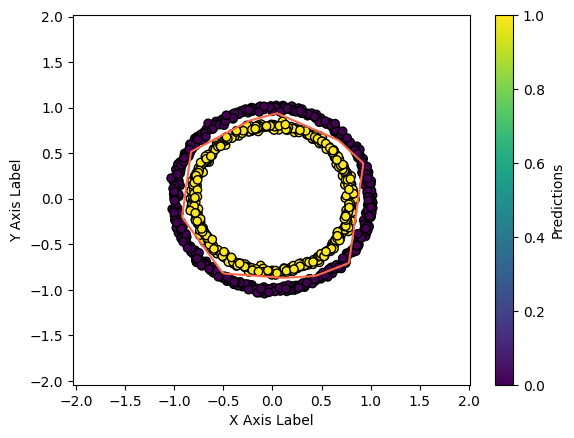

In [ ]:
plot_predictions()



In [ ]:
import pandas as pd

# Plot the accuracy vs loss plot using model_5 history data

In [ ]:
history_model_5= pd.DataFrame(history_model_5.history)

In [ ]:
history_model_5.head()

,loss,accuracy
0,0.696237,0.501
1,0.695226,0.489
2,0.694434,0.482
3,0.693919,0.487
4,0.693495,0.483


<Axes: >

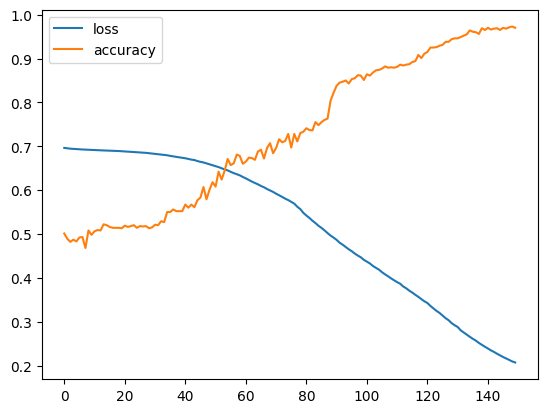

In [ ]:
history_model_5.plot()

<Axes: >

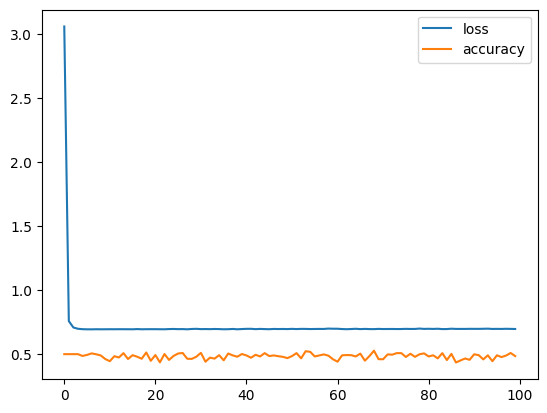

In [ ]:
# plot model_4 loss vs accuracy curve
pd.DataFrame(history_model_4.history).plot()

# Recreate Sigmoid functionin graph

---



In [ ]:
in_x=np.arange(-10,10,.1, dtype='float32')

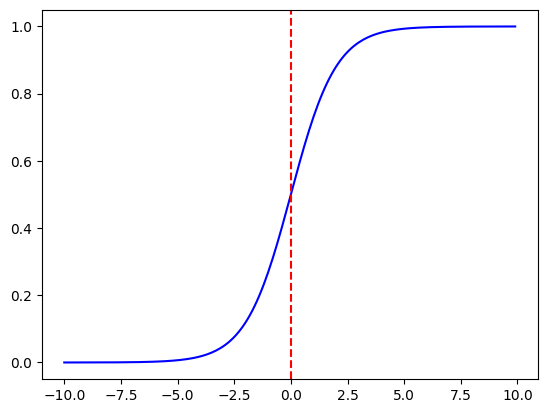

In [ ]:
plt.plot(in_x, tf.sigmoid(in_x), c='b')
plt.axvline(x=0, color='r', linestyle='--')

In [ ]:
# Recreate Relu functionin graph

In [ ]:
y = list(map(lambda x: x if x > 0 else 0, in_x))

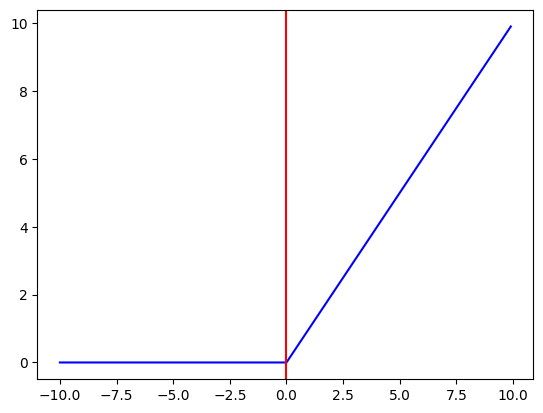

In [ ]:
plt.plot(in_x, y, c='b')
plt.axvline(x=0, color='r', linestyle='-')

# Building a new model model_6 with following tweaks:
- Learning rate callback to moderate learning rate based on the loss, this is applied **during** the model traing.
- Plot the loss vs accuracy grapf for model_6

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
n_samples=1500

X1,y1= make_circles(n_samples,
                  noise=0.02,
                  random_state=42)

In [ ]:
# prompt: train test split on X and y

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)


In [ ]:
#Define the model
model_6= tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
                metrics=['accuracy'])

# Defing the learning rate callback

In [ ]:
import math
def scheduler(epoch, lr):
  #if(epoch<30):
  #  return lr
  #else:
    return lr * math.exp(0.01)



In [ ]:
learning_rate_callback= tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# Fit the model

history_model_6=model_6.fit(X_train, y_train,callbacks=[learning_rate_callback], epochs=150, verbose=0)

#history_model_6=model_6.fit(X_train, y_train, epochs=150, verbose=0)

In [ ]:
history_df= pd.DataFrame(history_model_6.history)

<Axes: >

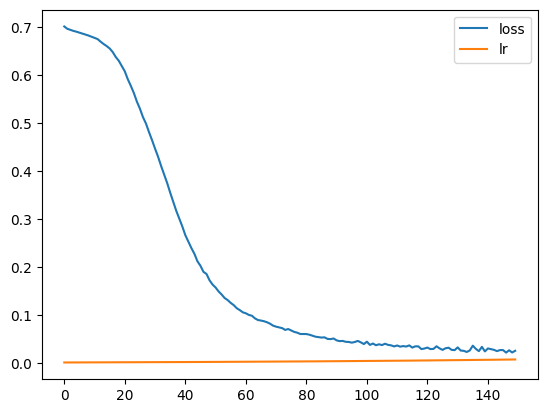

In [ ]:
history_df.drop(['accuracy'], axis=1).plot()

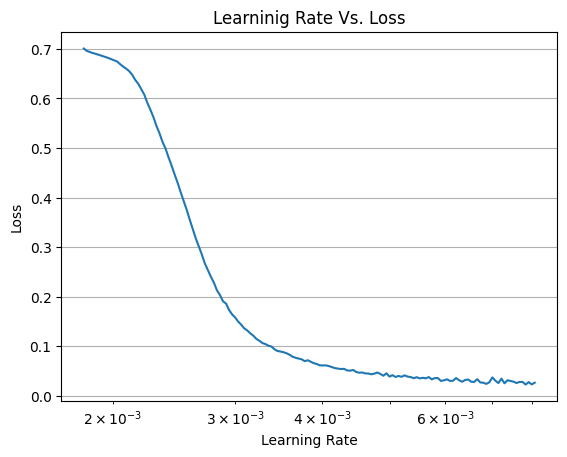

In [ ]:
# Plotting the data with semilogx
plt.semilogx(history_df['lr'], history_df['loss'])

# Adding labels and title
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learninig Rate Vs. Loss')

# Adding a grid for better readability
plt.grid(True)

In [ ]:
history_df[(history_df['loss']>.3) & (history_df['loss']<.72)]['lr'].median()

0.0021985248

# USe the learnig rate discoved above

In [ ]:
#Define the model
model_7= tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_model_7=model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.4983
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4975
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5033
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5183
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5183
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5333
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5467
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5483
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5483
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5700
Epoch 11/50
38/38 [

In [ ]:
model_7.evaluate(X_test, y_test)
history_df.describe()

10/10 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.9833


,loss,accuracy,lr
count,150.000000,150.000000,150.000000
mean,0.200309,0.917067,0.004199
std,0.233563,0.152382,0.001791
min,0.022346,0.495000,0.001818
25%,0.036155,0.967708,0.002639
50%,0.068981,0.991667,0.003830
75%,0.313340,0.993333,0.005558
max,0.700759,0.996667,0.008067


1314/1314 [==============================] - 2s 1ms/step


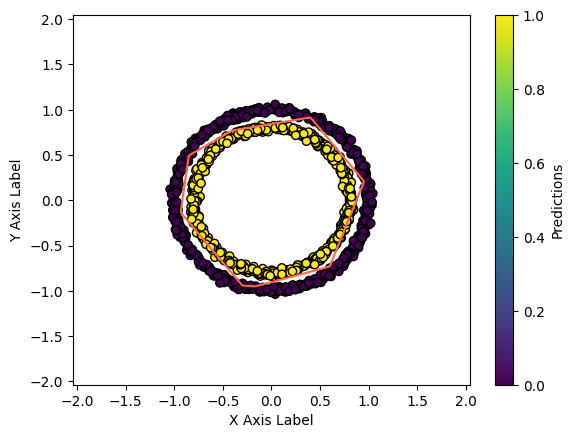

1295/1295 [==============================] - 2s 1ms/step


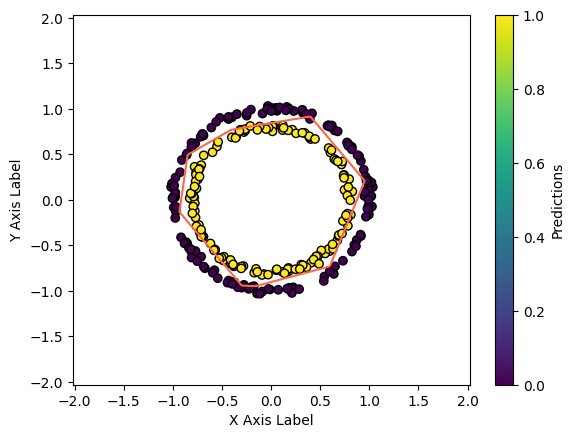

In [ ]:
# Create the first subplot

plot_predictions(model= model_7,
                     X=X_train,
                     y=y_train)

# Create the second subplot

plot_predictions(model= model_7,
                     X=X_test,
                     y=y_test)

# More Classification model evaluartion metrics
- Accuracy
- Precison
- Recall
- F1- Score
- Confuson Matrics

In [ ]:
m=tf.keras.metrics.Accuracy()
m.update_state([[1], [2], [3], [4]], [[0], [1000], [3], [4]])
m.result().numpy()

0.5

In [ ]:
y_float= model_6.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
preds=list(map(lambda x: 1 if x>0.5 else 0, y_float))

In [ ]:
# prompt: sklearn confuson matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, preds)

print(confusion_matrix)


[[149   1]
 [  2 148]]


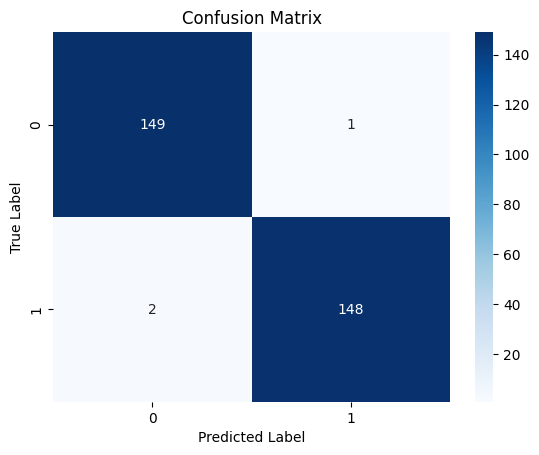

In [ ]:
# prompt: decorate the confuson matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix


# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


# Builsing Multiclass classification Model

**Changes Compared to Binary classification Model**
- Softmax instead of Sigmoid activation at the output layer
- 10 instead of 2 output target levels
- 24 X 24 instead of 1 X 2 input shape
- Categoticalcrossentropy loss function instead of BinaryEntopy loss funtion

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
targets=[
"T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

Text(0.5, 1.0, 'Shirt')

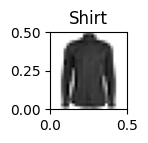

In [ ]:
index_num= np.random.randint(0, len(x_train),1)
plt.figure(figsize=(1, 1))
plt.imshow(x_train[index_num].squeeze(), cmap=plt.cm.binary, extent=[0, 0.5, 0, .5])
plt.title(targets[y_train[index_num].item()])

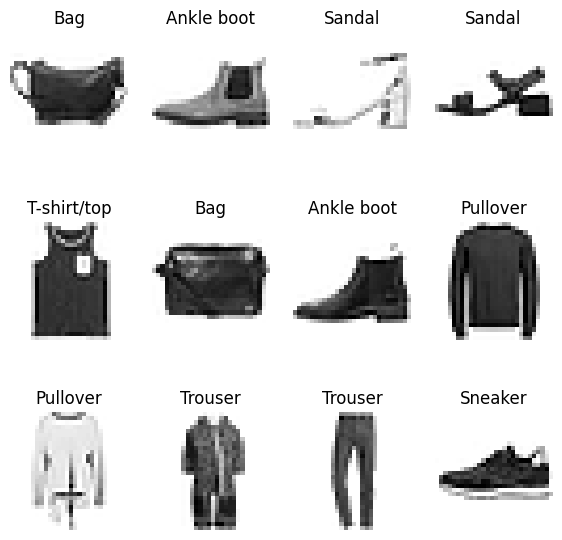

In [ ]:

plt.figure(figsize=(7,7))

for i in np.arange(1,13,1):
  plt.subplot(3,4,i)
  index_num= np.random.randint(0, len(x_train),1)
  plt.imshow(x_train[index_num].squeeze(), cmap=plt.cm.binary, extent=[0, 0.5, 0, .5])
  plt.title(targets[y_train[index_num].item()])
  plt.axis(False)

In [ ]:
t= np.arange(1,5,4)
t

array([1])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax'),
])

model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [ ]:
history_model_8=model_8.fit(x_train,
                            y_train,
                            epochs=10,
                            verbose=1,
                            validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3599 - accuracy: 0.1008 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0999 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
pd.DataFrame(history_model_8.history)

,loss,accuracy,val_loss,val_accuracy
0,2.359851,0.100783,2.304024,0.1
1,2.303997,0.097467,2.304805,0.1
2,2.304041,0.099317,2.304017,0.1
3,2.303978,0.099867,2.304295,0.1
4,2.303913,0.099800,2.302804,0.1
5,2.303870,0.100250,2.303548,0.1
6,2.303969,0.097750,2.303091,0.1
7,2.304220,0.099300,2.304401,0.1
8,2.303947,0.100617,2.303392,0.1
9,2.303968,0.100100,2.304561,0.1


<Axes: >

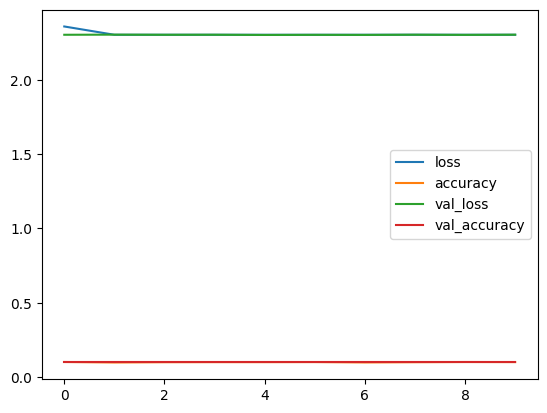

In [ ]:
pd.DataFrame(history_model_8.history).plot()

In [ ]:
#lized the data

x_train_norm=x_train/255
x_test_norm=x_test/255

x_train_norm.min(), x_train_norm.max(), x_test_norm.min(), x_test_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax'),
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [ ]:
history_model_9=model_9.fit(x_train_norm,
                            y_train,
                            epochs=10,
                            verbose=1,
                            validation_data=(x_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1235 - accuracy: 0.5190 - val_loss: 0.9785 - val_accuracy: 0.5852
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8963 - accuracy: 0.6304 - val_loss: 0.8328 - val_accuracy: 0.6640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8147 - accuracy: 0.6648 - val_loss: 0.8162 - val_accuracy: 0.6745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7993 - accuracy: 0.6718 - val_loss: 0.8302 - val_accuracy: 0.6725
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7911 - accuracy: 0.6742 - val_loss: 0.8196 - val_accuracy: 0.6589
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7858 - accuracy: 0.6786 - val_loss: 0.8386 - val_accuracy: 0.6604
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7840 - accuracy: 0.6785 - val_loss: 0.8032 - val_accuracy:

<Axes: >

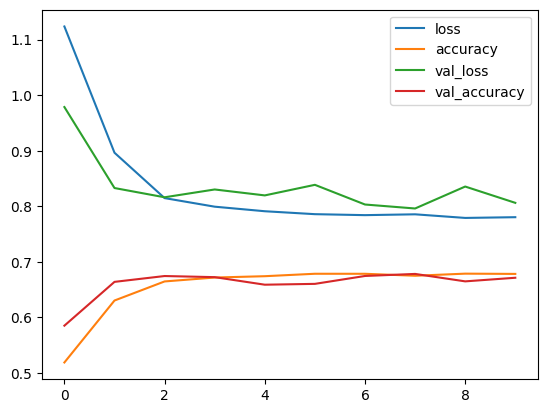

In [ ]:
pd.DataFrame(history_model_9.history).plot()

In [ ]:
tf.random.set_seed(42)

model_10= tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax'),
])

model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
import math
def scheduler_10(epoch, lr):
  if(epoch<10):
    return 10**(-4)
  else:
    return lr * math.exp(0.01)

learning_rate_scheduler_callback_10=tf.keras.callbacks.LearningRateScheduler(scheduler_10)

In [ ]:
history_model_10=model_10.fit(x_train_norm,
                            y_train,
                            epochs=50,
                            verbose=1,
                            validation_data=(x_test_norm,y_test),
                            callbacks=[learning_rate_scheduler_callback_10])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0034 - accuracy: 0.2612 - val_loss: 1.7429 - val_accuracy: 0.3796 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5629 - accuracy: 0.4376 - val_loss: 1.4200 - val_accuracy: 0.4885 - lr: 1.0000e-04
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2840 - accuracy: 0.5191 - val_loss: 1.1806 - val_accuracy: 0.5547 - lr: 1.0000e-04
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0962 - accuracy: 0.5810 - val_loss: 1.0484 - val_accuracy: 0.6004 - lr: 1.0000e-04
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9866 - accuracy: 0.6246 - val_loss: 0.9607 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9061 - accuracy: 0.6665 - val_loss: 0.8997 - val_accuracy: 0.6696 - lr: 1.0000e-04
Epoch 7/50
1875/1875 [============

In [ ]:
 math.exp(0.01)*10

10.10050167084168

In [ ]:
pd_history_10=pd.DataFrame(history_model_10.history)

In [ ]:
pd_history_10.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,2.003434,0.261200,1.742929,0.3796,0.0001
1,1.562888,0.437600,1.419963,0.4885,0.0001
2,1.283999,0.519117,1.180596,0.5547,0.0001
3,1.096199,0.581050,1.048427,0.6004,0.0001
4,0.986594,0.624600,0.960697,0.6498,0.0001


<Axes: >

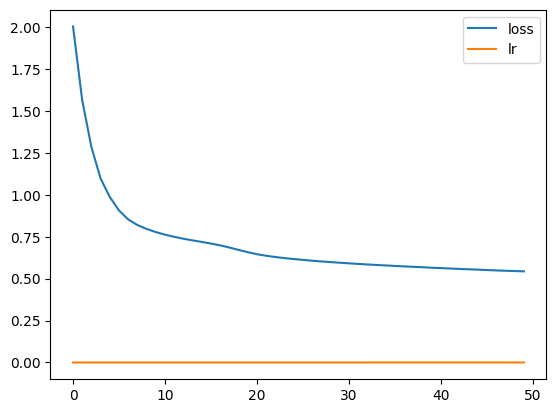

In [ ]:
pd_history_10.drop(['accuracy',	'val_loss',	'val_accuracy'], axis=1).plot()

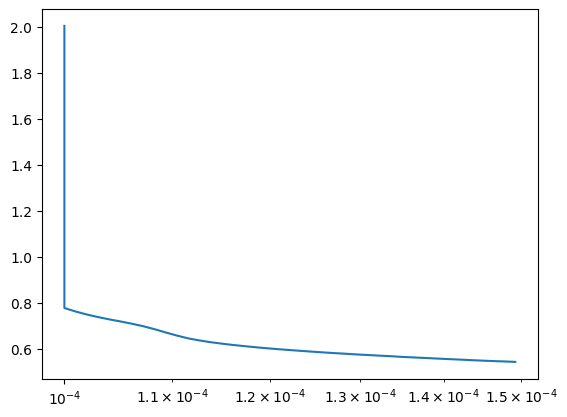

In [ ]:
plt.semilogx(pd_history_10['lr'], pd_history_10['loss'])

In [ ]:
10**-4

0.0001

In [ ]:
tf.random.set_seed(42)

model_11= tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax'),
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
import math
def scheduler_10(epoch, lr):
  # if(epoch<10):
  return 10**(-4)
  # else:
  #   return lr * math.exp(0.01)

learning_rate_scheduler_callback_11=tf.keras.callbacks.LearningRateScheduler(scheduler_10)

In [ ]:
history_model_10=model_11.fit(x_train_norm,
                            y_train,
                            epochs=50,
                            verbose=1,
                            validation_data=(x_test_norm,y_test),
                            callbacks=[learning_rate_scheduler_callback_10]
                            )

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9717 - accuracy: 0.2796 - val_loss: 1.8191 - val_accuracy: 0.2893 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7528 - accuracy: 0.2981 - val_loss: 1.6832 - val_accuracy: 0.3424 - lr: 1.0000e-04
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6132 - accuracy: 0.4266 - val_loss: 1.5470 - val_accuracy: 0.5214 - lr: 1.0000e-04
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4883 - accuracy: 0.5293 - val_loss: 1.4390 - val_accuracy: 0.5448 - lr: 1.0000e-04
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3885 - accuracy: 0.5560 - val_loss: 1.3471 - val_accuracy: 0.5713 - lr: 1.0000e-04
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2996 - accuracy: 0.5865 - val_loss: 1.2647 - val_accuracy: 0.6002 - lr: 1.0000e-04
Epoch 7/50
1875/1875 [============

<Axes: >

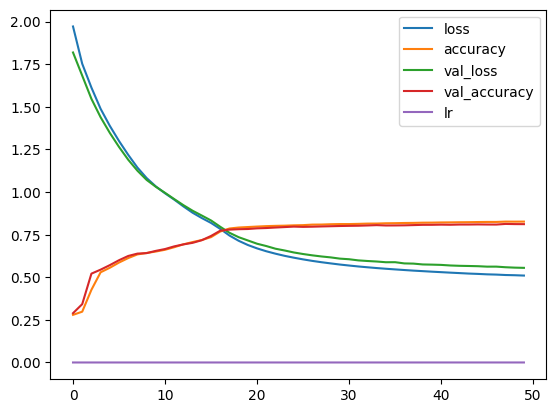

In [ ]:
pd.DataFrame(history_model_10.history).plot()

In [110]:
x_train[110].shape,

((28, 28),)

In [111]:
reshaped_input = tf.reshape(x_train[110], [-1, 28, 28])
print("Reshaped shape:", reshaped_input.shape)

Reshaped shape: (1, 28, 28)


In [103]:
reshaped_input.shape

TensorShape([1, 28, 28])

In [114]:
prediction=model_11.predict(reshaped_input)

#image_tensor.reshape(-1, 28*28)

1/1 [==============================] - 0s 19ms/step


In [238]:
def image_and_prediction(index, target):
  x_train_norm=x_train[index]/255
  reshaped_input = tf.reshape(x_train_norm, [-1, 28, 28])
  prediction=model_11.predict(reshaped_input)
  print(target[prediction.argmax()])
  plt.figure(figsize=(7,7))
  plt.subplot(3,4,i)
  plt.imshow(x_train[index], cmap=plt.cm.binary, extent=[0, 0.5, 0, .5])
  plt.title("prediction: "+ target[prediction.argmax()]+" | Actual: "+target[y_train[index]])
  plt.axis(False)



1/1 [==============================] - 0s 20ms/step
Ankle boot


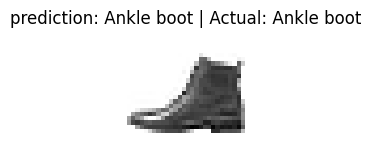

In [276]:
rand_index=np.random.randint(0, len(x_test))

image_and_prediction(rand_index, targets)


In [170]:
# Confusion Matrix for multi-class claification neural network

In [183]:
# prompt: sklearn confuson matrix

from sklearn.metrics import confusion_matrix
x_test_norm=x_test/255
preds=model_11.predict(x_test_norm)
confusion_matrix = confusion_matrix(y_test,  np.argmax(preds, axis=1))



313/313 [==============================] - 1s 2ms/step


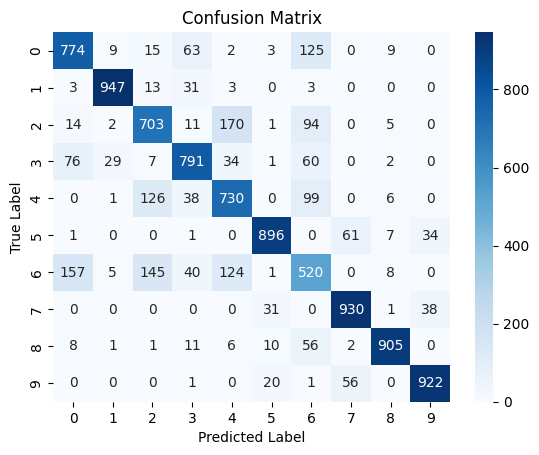

In [184]:
# prompt: decorate the confuson matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix


# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [241]:
model_11.layers

In [249]:
model_11.layers[0]

In [252]:
w,b=model_11.layers[1].get_weights()

In [253]:
w.shape, b.shape

((784, 4), (4,))